#**Jason Locke**
# **Deep Learning HW2**
# **10-25-2020**

# Problem 1

### Mount Google Drive

In [4]:
from google.colab import drive
drive.mount("/content/drive")
dir = "/content/drive/My Drive/Colab Notebooks/Deep Learning/HW2"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Imports

In [5]:
import numpy as np
from tensorflow import keras
import tensorflow as tf
from tensorflow.keras import layers
import scipy
!pip install librosa # in colab, you’ll need to install this
import librosa

In [6]:
def readAudio(file_name):
  s, sr = librosa.load(file_name, sr=None)
  S = librosa.stft(s, n_fft=1024, hop_length=512)
  S_abs = np.abs(S).T #get absolute values and transpose to get each row as spectrum
  S = S.T #transpose values

  return(S, S_abs, sr)

In [7]:
#Read main and test audio files and convert to spectrograms
# |X| = dirty signal
# |S| = clean sgnal
S, S_abs, sr = readAudio('drive/My Drive/Colab Notebooks/Deep Learning/HW2/train_clean_male.wav')
X, X_abs, sr = readAudio('drive/My Drive/Colab Notebooks/Deep Learning/HW2/train_dirty_male.wav')
test1, test1_abs, sr = readAudio('drive/My Drive/Colab Notebooks/Deep Learning/HW2/test_x_01.wav')
test2, test2_abs, sr = readAudio('drive/My Drive/Colab Notebooks/Deep Learning/HW2/test_x_02.wav')

In [8]:
print(X_abs.shape)
print(S_abs.shape)

(2459, 513)
(2459, 513)


In [9]:
X_abs = X_abs.reshape(2459,513,1)

In [10]:
#Create 1D CNN with 2 hidden layers
shape = (513,1) # Define shape of input for Keras model
#nb_features = 64 # number of features per features type (shape, texture, margin)   

model = keras.Sequential(
    [
        tf.keras.layers.Input(shape=shape),
        tf.keras.layers.Conv1D(filters=32, kernel_size=2,activation='relu'),
        tf.keras.layers.MaxPooling1D(pool_size=3, strides=2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(513, activation='relu')
    ]
)

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 512, 32)           96        
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 255, 32)           0         
_________________________________________________________________
flatten (Flatten)            (None, 8160)              0         
_________________________________________________________________
dense (Dense)                (None, 513)               4186593   
Total params: 4,186,689
Trainable params: 4,186,689
Non-trainable params: 0
_________________________________________________________________


In [11]:
#Compile and fit the model
model.compile(loss="MeanSquaredError", optimizer="adam", metrics=["accuracy"])

model.fit(X_abs, S_abs, batch_size=50, epochs=50, validation_split=0.1)

Epoch 1/50
45/45 [==============================] - 0s 7ms/step - loss: 0.0616 - accuracy: 0.0764 - val_loss: 0.0238 - val_accuracy: 0.1504
Epoch 2/50
45/45 [==============================] - 0s 3ms/step - loss: 0.0308 - accuracy: 0.2296 - val_loss: 0.0175 - val_accuracy: 0.2439
Epoch 3/50
45/45 [==============================] - 0s 3ms/step - loss: 0.0190 - accuracy: 0.3086 - val_loss: 0.0134 - val_accuracy: 0.3008
Epoch 4/50
45/45 [==============================] - 0s 3ms/step - loss: 0.0145 - accuracy: 0.3660 - val_loss: 0.0120 - val_accuracy: 0.3333
Epoch 5/50
45/45 [==============================] - 0s 3ms/step - loss: 0.0122 - accuracy: 0.4031 - val_loss: 0.0102 - val_accuracy: 0.3659
Epoch 6/50
45/45 [==============================] - 0s 3ms/step - loss: 0.0110 - accuracy: 0.4121 - val_loss: 0.0099 - val_accuracy: 0.3699
Epoch 7/50
45/45 [==============================] - 0s 3ms/step - loss: 0.0101 - accuracy: 0.4302 - val_loss: 0.0097 - val_accuracy: 0.3902
Epoch 8/50
45/45 [==

In [12]:
#Use trained models to perform predictions
test1_predict = model.predict(test1_abs[:,:,np.newaxis])
test2_predict = model.predict(test2_abs[:,:,np.newaxis])

In [13]:
s1 = np.multiply((test1/test1_abs).T, np.abs(test1_predict).T)
s2 = np.multiply((test2/test2_abs).T, np.abs(test2_predict).T)

In [14]:
scipy.signal.istft(s1)
sh_test1 = scipy.signal.istft(s1)
scipy.signal.istft(s2)
sh_test2 = scipy.signal.istft(s2)

In [15]:
#Conver to Numpy Arrays
sh_test1 = np.array(sh_test1)
sh_test2 = np.array(sh_test2)

In [16]:
librosa.output.write_wav('test_s_01_recons.wav', sh_test1, sr)
librosa.output.write_wav('test_s_02_recons.wav', sh_test2, sr)

In [17]:
from IPython.display import Audio
Audio('test_s_01_recons.wav')

In [18]:
from IPython.display import Audio
Audio('test_s_02_recons.wav')

Output hidden; open in https://colab.research.google.com to view.

In [19]:
#SNR Function
def SNR(y,yhat):
  num = np.sum(np.square(y))
  dem = np.sum(np.square(y-yhat))
  return 10 * np.log10(num/dem)

In [20]:
SNR(test1_abs,test1_predict)

7.671246528625488

# Problem 2

### Imports

In [71]:
import numpy as np
from tensorflow import keras
import tensorflow as tf
from tensorflow.keras import layers
import scipy
!pip install librosa # in colab, you’ll need to install this
import librosa

In [72]:
#Read main and test audio files and convert to spectrograms
# |X| = dirty signal
# |S| = clean sgnal
S, S_abs, sr = readAudio('drive/My Drive/Colab Notebooks/Deep Learning/HW2/train_clean_male.wav')
X, X_abs, sr = readAudio('drive/My Drive/Colab Notebooks/Deep Learning/HW2/train_dirty_male.wav')
test1, test1_abs, sr = readAudio('drive/My Drive/Colab Notebooks/Deep Learning/HW2/test_x_01.wav')
test2, test2_abs, sr = readAudio('drive/My Drive/Colab Notebooks/Deep Learning/HW2/test_x_02.wav')

In [73]:
#Create 19 silent frames
silent_padding = np.zeros((19, 20, 513)) +.0000001
silent_padding.shape

(19, 20, 513)

In [74]:
#Create function to transform array of examples into images for 2D CNN
def image_shape(x):
  image_list = []
  for i in range(x.shape[0]-19):
    image_list.append(x[i:i+20,0:513])
  image_list = np.array(image_list)
  image_list = np.concatenate((silent_padding,image_list))
  return image_list

In [75]:
#Call function and return new array
X_abs_final = image_shape(X_abs)

X_abs_final = X_abs_final.reshape(2459,20,513,1)

print(X_abs_final.shape)

(2459, 20, 513, 1)


In [88]:
#Create 2D CNN with 2 hidden layers
shape = (20,513,1) # Define shape of input for Keras model

model = keras.Sequential(
    [
        tf.keras.layers.Input(shape=shape),
        tf.keras.layers.Conv2D(filters=32, kernel_size=(2,2),activation='relu'),
        tf.keras.layers.MaxPooling2D(pool_size=(3,3), strides=2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(513, activation='relu')
    ]
)

model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 19, 512, 32)       160       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 9, 255, 32)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 73440)             0         
_________________________________________________________________
dense_4 (Dense)              (None, 513)               37675233  
Total params: 37,675,393
Trainable params: 37,675,393
Non-trainable params: 0
_________________________________________________________________


In [89]:
#Compile and fit the model
model.compile(loss="MeanSquaredError", optimizer="adam", metrics=["accuracy"])

#model.fit(S_abs[:,:,np.newaxis], X_abs[:,np.newaxis,:], batch_size=50, epochs=50, validation_split=0.1)
model.fit(X_abs_final, S_abs, batch_size=50, epochs=500, validation_split=0.1)

Epoch 1/500
45/45 [==============================] - 1s 16ms/step - loss: 0.1025 - accuracy: 0.0325 - val_loss: 0.0484 - val_accuracy: 0.0122
Epoch 2/500
45/45 [==============================] - 1s 13ms/step - loss: 0.0929 - accuracy: 0.0511 - val_loss: 0.0473 - val_accuracy: 0.0122
Epoch 3/500
45/45 [==============================] - 1s 13ms/step - loss: 0.0871 - accuracy: 0.0682 - val_loss: 0.0457 - val_accuracy: 0.0244
Epoch 4/500
45/45 [==============================] - 1s 13ms/step - loss: 0.0823 - accuracy: 0.0773 - val_loss: 0.0465 - val_accuracy: 0.0163
Epoch 5/500
45/45 [==============================] - 1s 13ms/step - loss: 0.0796 - accuracy: 0.0881 - val_loss: 0.0461 - val_accuracy: 0.0163
Epoch 6/500
45/45 [==============================] - 1s 13ms/step - loss: 0.0751 - accuracy: 0.1066 - val_loss: 0.0448 - val_accuracy: 0.0163
Epoch 7/500
45/45 [==============================] - 1s 13ms/step - loss: 0.0706 - accuracy: 0.1039 - val_loss: 0.0445 - val_accuracy: 0.0285
Epoch 

In [90]:
#Call function and return new array for test datasets
test1_abs_final = image_shape(test1_abs)
test1_abs_final = test1_abs_final.reshape(142,20,513,1)

test2_abs_final = image_shape(test2_abs)
test2_abs_final = test2_abs_final.reshape(380,20,513,1)

print(test1_abs_final.shape)
print(test2_abs_final.shape)

(142, 20, 513, 1)
(380, 20, 513, 1)


In [91]:
#Use trained models to perform predictions
test1_predict = model.predict(test1_abs_final)
test2_predict = model.predict(test2_abs_final)

In [92]:
s1 = np.multiply((test1/test1_abs).T, np.abs(test1_predict).T)
s2 = np.multiply((test2/test2_abs).T, np.abs(test2_predict).T)

In [93]:
scipy.signal.istft(s1)
sh_test1 = scipy.signal.istft(s1)
scipy.signal.istft(s2)
sh_test2 = scipy.signal.istft(s2)

In [94]:
#Convert to Numpy Arrays
sh_test1 = np.array(sh_test1)
sh_test2 = np.array(sh_test2)

In [95]:
librosa.output.write_wav('test_s_01_2d_recons.wav', sh_test1, sr)
librosa.output.write_wav('test_s_02_2d_recons.wav', sh_test2, sr)

In [96]:
from IPython.display import Audio
Audio('test_s_01_2d_recons.wav')

In [97]:
from IPython.display import Audio
Audio('test_s_02_2d_recons.wav')

Output hidden; open in https://colab.research.google.com to view.

In [98]:
SNR(test1_abs,test1_predict)

0.9868786484003067

#Problem 3

### Imports

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow import keras
import numpy as np

In [ ]:
#Load cifar10 data
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 (black pixel) and 1 (white pixel)
X_train, X_test = X_train / 255.0, X_test / 255.0

In [ ]:
#Scale values around 0 from -1 to 1
X_train_scaled = (X_train-0.5)/0.5
X_test_scaled = (X_test-0.5)/0.5

#Copy labels for scaled values
y_train_scaled = y_train

In [ ]:
#Set aside validation data of 5000 images or 10%
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.10, random_state=25)
X_train_scaled, X_val_scaled, y_train_scaled, y_val_scaled = train_test_split(X_train_scaled, y_train_scaled, test_size=0.10, random_state=25)

In [ ]:
#Use Keras utility to transform labels into onehot encoding (binary categories)
y_train_cat = keras.utils.to_categorical(y_train, 10)
y_test_cat = keras.utils.to_categorical(y_test, 10)
y_train_scaled_cat = keras.utils.to_categorical(y_train_scaled, 10)
y_val_scaled_cat = keras.utils.to_categorical(y_val_scaled, 10)

In [ ]:
#Create 2D CNN with 2 hidden layers
shape = (32,32,3) # Define shape of input for Keras model

init = tf.keras.initializers.HeNormal(seed=None)

model = keras.Sequential(
    [
        tf.keras.layers.Input(shape=shape),
        tf.keras.layers.Conv2D(filters=10, kernel_size=(5,5), strides=1, activation='relu'),
        tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=2),
        tf.keras.layers.Conv2D(filters=10, kernel_size=(5,5), strides=1, activation='relu'),
        tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=2),
        tf.keras.layers.Flatten(),
        #tf.keras.layers.Dense(513,activation='relu'),
        tf.keras.layers.Dense(20,activation='relu',kernel_initializer=init),
        tf.keras.layers.Dense(10, activation='softmax',kernel_initializer=init)
    ]
)

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 10)        760       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 10)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 10, 10)        2510      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 10)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 250)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 20)                5020      
_________________________________________________________________
dense_3 (Dense)              (None, 10)               

In [ ]:
#Compile and fit the model 
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
#model.compile(loss="MeanSquaredError", optimizer="adam", metrics=["accuracy"])

#model.fit(S_abs[:,:,np.newaxis], X_abs[:,np.newaxis,:], batch_size=50, epochs=50, validation_split=0.1)
#model.fit(X_train, y_train, batch_size=50, epochs=200, validation_split=0.1)
#history = model.fit(X_train_scaled, y_train_scaled, batch_size=50, epochs=2, validation_data=(X_val_scaled,y_val_scaled))
history = model.fit(X_train_scaled, y_train_scaled_cat, batch_size=512, epochs=200, validation_data=(X_val_scaled,y_val_scaled_cat))

Epoch 1/200
88/88 [==============================] - 1s 8ms/step - loss: 2.0584 - accuracy: 0.2385 - val_loss: 1.8058 - val_accuracy: 0.3404
Epoch 2/200
88/88 [==============================] - 1s 6ms/step - loss: 1.6788 - accuracy: 0.3841 - val_loss: 1.6074 - val_accuracy: 0.4226
Epoch 3/200
88/88 [==============================] - 1s 6ms/step - loss: 1.5582 - accuracy: 0.4346 - val_loss: 1.5166 - val_accuracy: 0.4580
Epoch 4/200
88/88 [==============================] - 1s 6ms/step - loss: 1.4799 - accuracy: 0.4659 - val_loss: 1.4558 - val_accuracy: 0.4814
Epoch 5/200
88/88 [==============================] - 1s 6ms/step - loss: 1.4200 - accuracy: 0.4912 - val_loss: 1.4068 - val_accuracy: 0.4972
Epoch 6/200
88/88 [==============================] - 1s 6ms/step - loss: 1.3762 - accuracy: 0.5067 - val_loss: 1.3801 - val_accuracy: 0.5136
Epoch 7/200
88/88 [==============================] - 1s 6ms/step - loss: 1.3410 - accuracy: 0.5226 - val_loss: 1.3494 - val_accuracy: 0.5228
Epoch 8/200
8

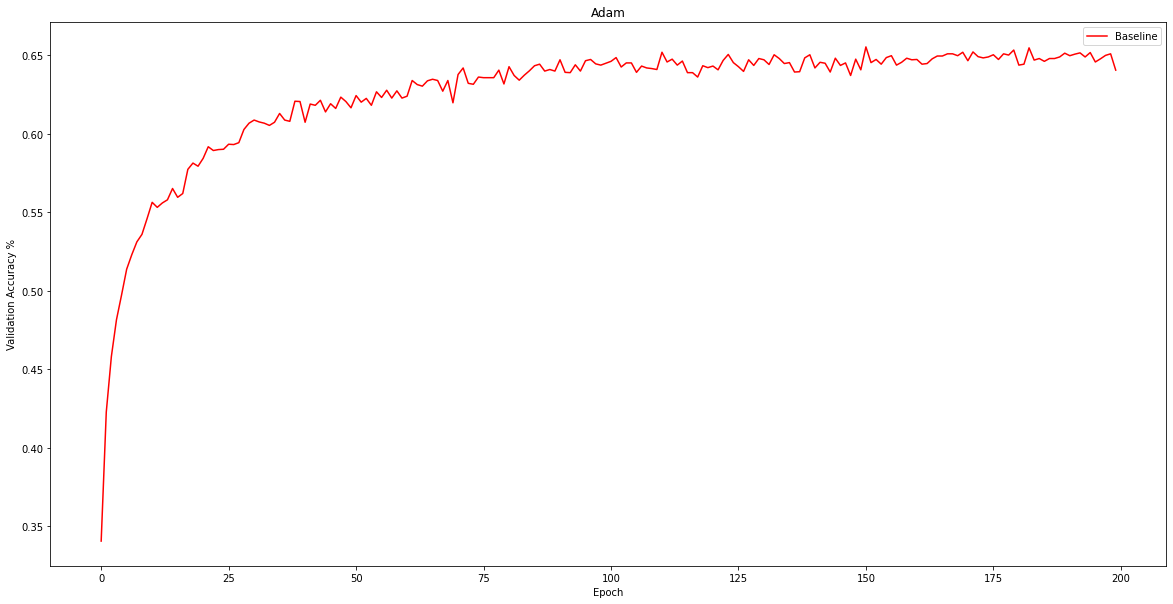

In [ ]:
accuracy_baseline = history.history['val_accuracy']

epochs = range(0,200)
plt.figure(figsize=(20,10))
plt.plot(epochs, accuracy_baseline, 'r', label='Baseline')
plt.title('Adam')
plt.xlabel('Epoch')
plt.ylabel('Validation Accuracy %')
plt.legend()
plt.show()

### Augmented Dataset #1

(b) Augmented dataset #1: Brighten every pixel in every image by 10%, e.g., by multiplying 1.1. Make sure though, that they don’t exceed 1. For example, you may want to do something like this: np.minimum(1.1*X, 1). 

In [ ]:
ad1 = np.minimum(1.1*X_train, 1)

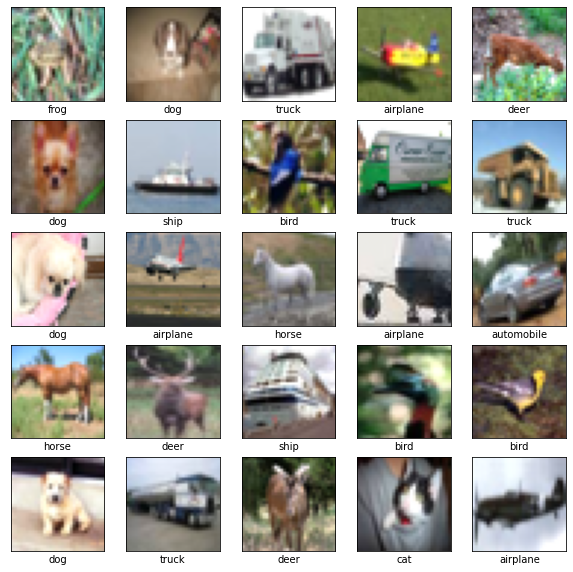

In [ ]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(ad1[i], cmap=plt.cm.binary)
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_names[y_train[i][0]])
plt.show()

### Augmented Dataset #2

(c) Augmented dataset #2: Darken every pixel in every image by 10%, e.g., by multiplying 0.9. 

In [ ]:
ad2 = .9*X_train

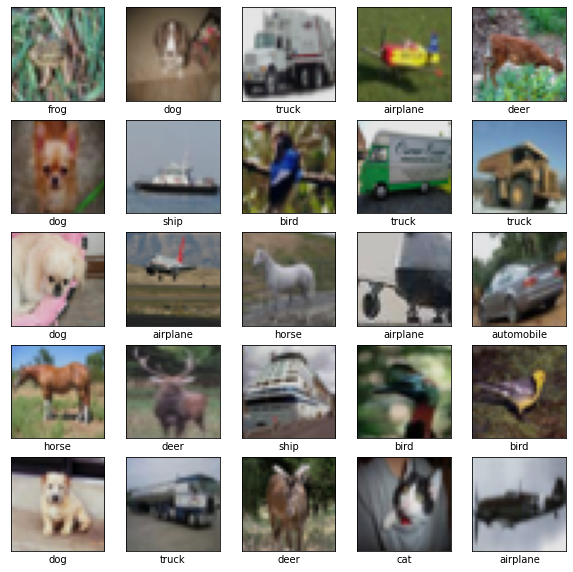

In [ ]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(ad2[i], cmap=plt.cm.binary)
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_names[y_train[i][0]])
plt.show()

### Augmented Dataset #3

(d) Augmented dataset #3: Flip all images horizontally (not upside down). As if they are mirrored. 

In [ ]:
ad3 = tf.image.flip_left_right(X_train)

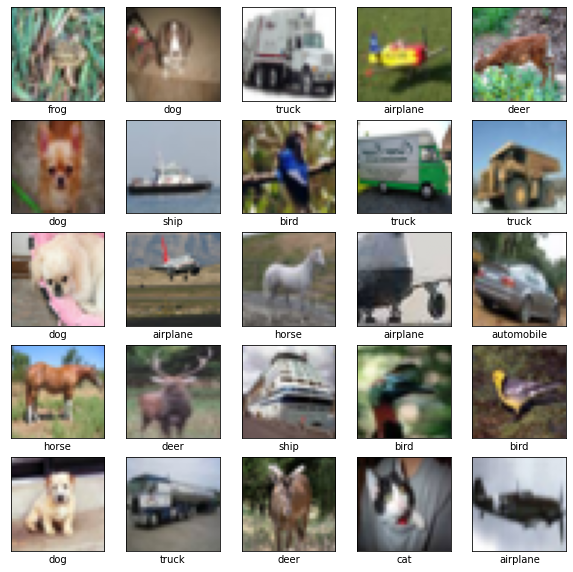

In [ ]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(ad3[i], cmap=plt.cm.binary)
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_names[y_train[i][0]])
plt.show()

In [ ]:
# Merge the 3 augmented datasets with original dataset as the 4th
X_combined = np.concatenate((ad1, ad2, ad3, X_train))
y_combined = np.concatenate((y_train_cat,y_train_cat,y_train_cat,y_train_cat))

In [ ]:
#Scale values around 0 from -1 to 1
X_combined = (X_combined-0.5)/0.5

In [ ]:
#Create 2D CNN with 2 hidden layers
shape = (32,32,3) # Define shape of input for Keras model

init = tf.keras.initializers.HeNormal(seed=None)

model = keras.Sequential(
    [
        tf.keras.layers.Input(shape=shape),
        tf.keras.layers.Conv2D(filters=10, kernel_size=(5,5), strides=1, activation='relu'),
        tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=2),
        tf.keras.layers.Conv2D(filters=10, kernel_size=(5,5), strides=1, activation='relu'),
        tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=2),
        tf.keras.layers.Flatten(),
        #tf.keras.layers.Dense(513,activation='relu'),
        tf.keras.layers.Dense(20,activation='relu',kernel_initializer=init),
        tf.keras.layers.Dense(10, activation='softmax',kernel_initializer=init)
    ]
)

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 28, 28, 10)        760       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 10)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 10, 10, 10)        2510      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 10)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 250)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 20)                5020      
_________________________________________________________________
dense_5 (Dense)              (None, 10)               

In [ ]:
#Compile and fit the model 
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
#model.compile(loss="MeanSquaredError", optimizer="adam", metrics=["accuracy"])

#model.fit(S_abs[:,:,np.newaxis], X_abs[:,np.newaxis,:], batch_size=50, epochs=50, validation_split=0.1)
#model.fit(X_train, y_train, batch_size=50, epochs=200, validation_split=0.1)
history2 = model.fit(X_combined, y_combined, batch_size=512, epochs=200, validation_data=(X_val_scaled,y_val_scaled_cat))

Epoch 1/200
352/352 [==============================] - 2s 6ms/step - loss: 1.7403 - accuracy: 0.3634 - val_loss: 1.4305 - val_accuracy: 0.4832
Epoch 2/200
352/352 [==============================] - 2s 6ms/step - loss: 1.3592 - accuracy: 0.5110 - val_loss: 1.3276 - val_accuracy: 0.5166
Epoch 3/200
352/352 [==============================] - 2s 6ms/step - loss: 1.2647 - accuracy: 0.5477 - val_loss: 1.2655 - val_accuracy: 0.5424
Epoch 4/200
352/352 [==============================] - 2s 6ms/step - loss: 1.2097 - accuracy: 0.5689 - val_loss: 1.2321 - val_accuracy: 0.5516
Epoch 5/200
352/352 [==============================] - 2s 6ms/step - loss: 1.1714 - accuracy: 0.5846 - val_loss: 1.1964 - val_accuracy: 0.5710
Epoch 6/200
352/352 [==============================] - 2s 6ms/step - loss: 1.1384 - accuracy: 0.5972 - val_loss: 1.1821 - val_accuracy: 0.5764
Epoch 7/200
352/352 [==============================] - 2s 6ms/step - loss: 1.1139 - accuracy: 0.6067 - val_loss: 1.1585 - val_accuracy: 0.5830

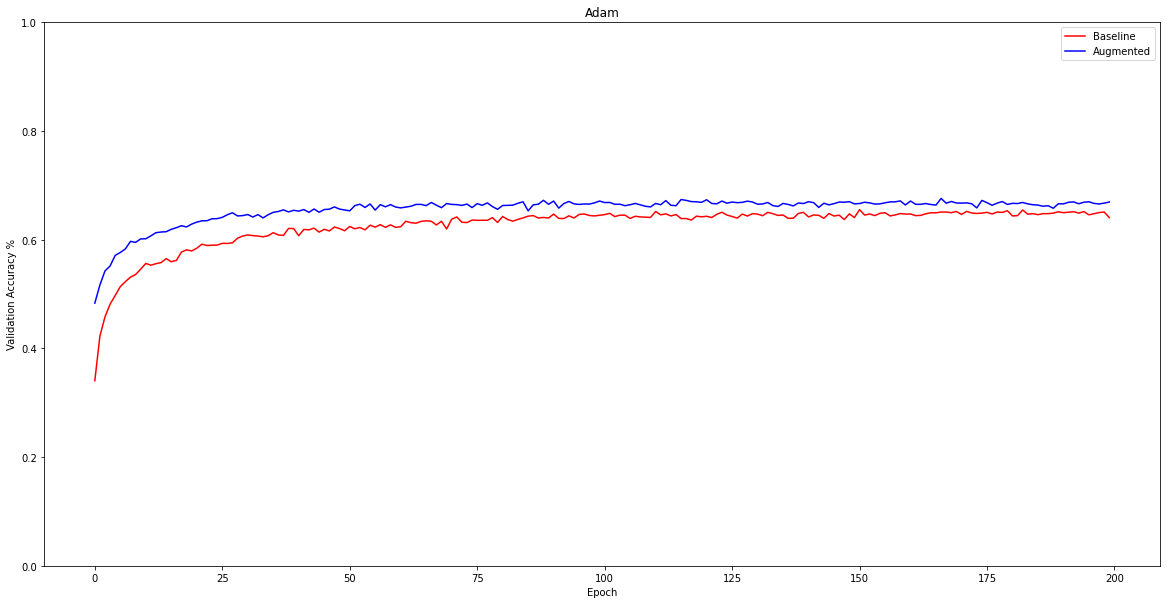

In [ ]:
validation_baseline = history.history['val_accuracy']
augmented = history2.history['val_accuracy']

epochs = range(0,200)
plt.figure(figsize=(20,10))
plt.plot(epochs, validation_baseline, 'r', label='Baseline')
plt.plot(epochs, augmented, 'b', label='Augmented')
plt.axis([None, None, 0, 1])
plt.title('Adam')
plt.xlabel('Epoch')
plt.ylabel('Validation Accuracy %')
plt.legend()
plt.show()

# Problem 4

### Imports

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow import keras
import numpy as np

In [ ]:
#Load cifar10 data
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()

In [ ]:
#Create training datasets
X_train_500 = X_train[49500:]/255
y_train_500 = y_train[49500:]
X_train = X_train[0:49500]/255
y_train = y_train[0:49500:]

X_test = X_test/255

#Use Keras utility to transform labels into onehot encoding (binary categories)
y_test = keras.utils.to_categorical(y_test, 10)
y_train_500 = keras.utils.to_categorical(y_train_500, 10)

### Pretext Data Task

(a) On the other hand, we will assume that the rest of the 49,500 training examples are unlabeled. We will create a bogus classiﬁcation problem using them. Let this unlabeled examples (or the examples that you disregard their original labels) be “class 0”.

In [ ]:
#Create class of 's for first unlabeled dataset
y_train_a = np.zeros(49500)

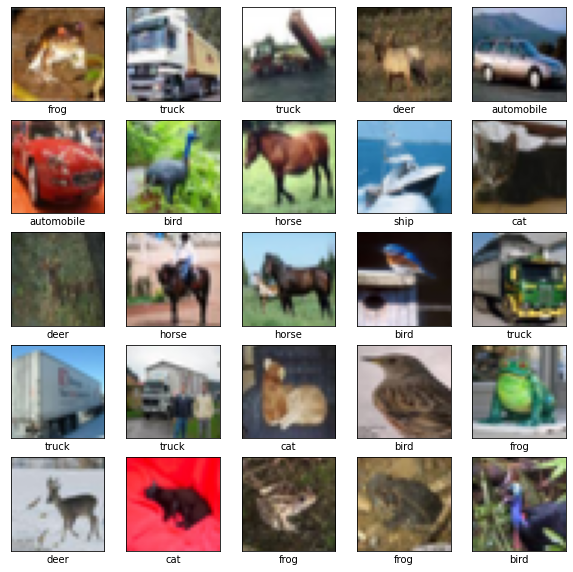

In [ ]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap=plt.cm.binary)
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_names[y_train[i][0]])
plt.show()

(b) “class 1”: Create a new class, by vertically ﬂipping all the images upside down. 

In [ ]:
#Flip images and store as new dataset
X_train_b = np.flip(X_train,axis=1)

#Create labels with 1's as class
y_train_b = np.ones(49500)

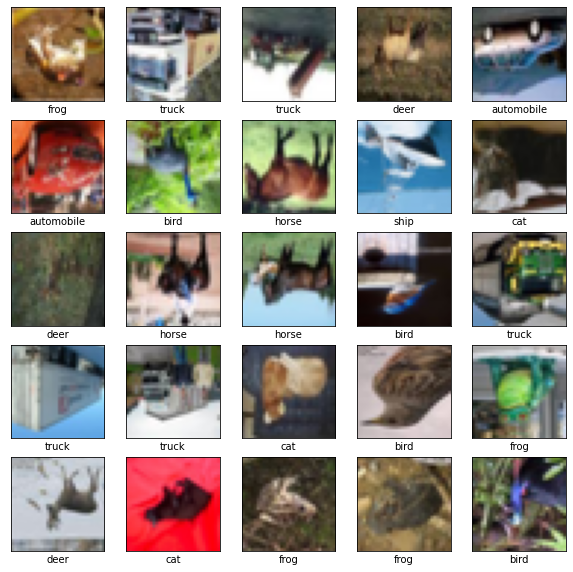

In [ ]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train_b[i], cmap=plt.cm.binary)
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_names[y_train[i][0]])
plt.show()

(c) “class 2”: Create another class, by rotating the images 90 degree counter-clock wise. 

In [ ]:
#Rotate images by 90 degrees
X_train_c = np.rot90(X_train, axes=(1,2))

#Create labels with 2's as class
y_train_c = np.ones(49500)*2

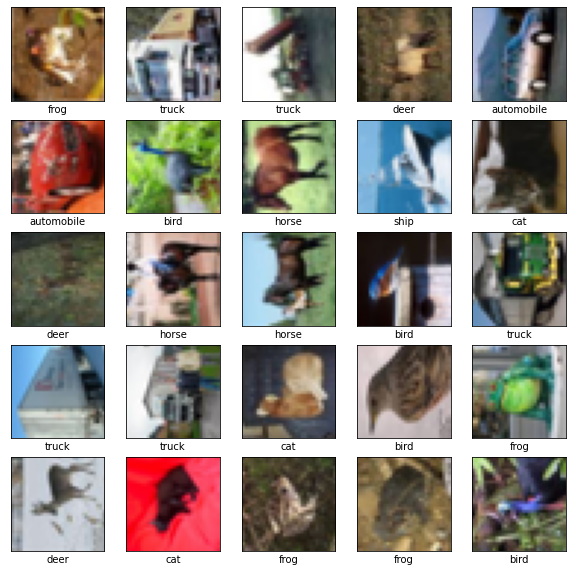

In [ ]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train_c[i], cmap=plt.cm.binary)
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_names[y_train[i][0]])
plt.show()

In [ ]:
# Merge the 3 augmented datasets with original dataset as the 4th
X_combined = np.concatenate((X_train, X_train_b, X_train_c))
y_combined = np.concatenate((y_train_a,y_train_b,y_train_c))

In [ ]:
#Use Keras utility to transform labels into onehot encoding (binary categories)
y_combined = keras.utils.to_categorical(y_combined, 3)

In [ ]:
#Create 2D CNN with 2 hidden layers
shape = (32,32,3) # Define shape of input for Keras model

init = tf.keras.initializers.HeNormal(seed=None)

model = keras.Sequential(
    [
        tf.keras.layers.Input(shape=shape),
        tf.keras.layers.Conv2D(filters=10, kernel_size=(5,5), strides=1, activation='relu'),
        tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=2),
        tf.keras.layers.Conv2D(filters=10, kernel_size=(5,5), strides=1, activation='relu'),
        tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=2),
        tf.keras.layers.Flatten(),
        #tf.keras.layers.Dense(513,activation='relu'),
        tf.keras.layers.Dense(20,activation='relu',kernel_initializer=init),
        tf.keras.layers.Dense(3, activation='softmax',kernel_initializer=init)
    ]
)

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 10)        760       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 10)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 10, 10)        2510      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 10)          0         
_________________________________________________________________
flatten (Flatten)            (None, 250)               0         
_________________________________________________________________
dense (Dense)                (None, 20)                5020      
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 6

In [ ]:
#Compile and fit the model 
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
#model.compile(loss="MeanSquaredError", optimizer="adam", metrics=["accuracy"])

#model.fit(S_abs[:,:,np.newaxis], X_abs[:,np.newaxis,:], batch_size=50, epochs=50, validation_split=0.1)
#model.fit(X_train, y_train, batch_size=50, epochs=200, validation_split=0.1)
history = model.fit(X_combined, y_combined, batch_size=512, epochs=100)

Epoch 1/100
291/291 [==============================] - 2s 6ms/step - loss: 0.9290 - accuracy: 0.5447
Epoch 2/100
291/291 [==============================] - 2s 6ms/step - loss: 0.8319 - accuracy: 0.6140
Epoch 3/100
291/291 [==============================] - 2s 6ms/step - loss: 0.7943 - accuracy: 0.6409
Epoch 4/100
291/291 [==============================] - 2s 6ms/step - loss: 0.7702 - accuracy: 0.6554
Epoch 5/100
291/291 [==============================] - 2s 6ms/step - loss: 0.7523 - accuracy: 0.6659
Epoch 6/100
291/291 [==============================] - 2s 6ms/step - loss: 0.7443 - accuracy: 0.6708
Epoch 7/100
291/291 [==============================] - 2s 6ms/step - loss: 0.7323 - accuracy: 0.6781
Epoch 8/100
291/291 [==============================] - 2s 6ms/step - loss: 0.7240 - accuracy: 0.6823
Epoch 9/100
291/291 [==============================] - 2s 6ms/step - loss: 0.7179 - accuracy: 0.6856
Epoch 10/100
291/291 [==============================] - 2s 6ms/step - loss: 0.7110 - accura

In [ ]:
#Remove last softmax layer
from keras.models import Model
model= Model(inputs=model.input, outputs=model.layers[-2].output)

#Save Keras Weights
#model.save(f"{dir}/problem4_pretext.h5")
#model.save(f"{dir}")

model.save_weights('my_model.h5')

### Baseline Data

In [ ]:
#Create 2D CNN with 2 hidden layers
shape = (32,32,3) # Define shape of input for Keras model

init = tf.keras.initializers.HeNormal(seed=None)

model = keras.Sequential(
    [
        tf.keras.layers.Input(shape=shape),
        tf.keras.layers.Conv2D(filters=10, kernel_size=(5,5), strides=1, activation='relu'),
        tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=2),
        tf.keras.layers.Conv2D(filters=10, kernel_size=(5,5), strides=1, activation='relu'),
        tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=2),
        tf.keras.layers.Flatten(),
        #tf.keras.layers.Dense(513,activation='relu'),
        tf.keras.layers.Dense(20,activation='relu',kernel_initializer=init),
        tf.keras.layers.Dense(10, activation='softmax',kernel_initializer=init)
    ]
)

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 28, 28, 10)        760       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 10)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 10, 10, 10)        2510      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 10)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 250)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 20)                5020      
_________________________________________________________________
dense_3 (Dense)              (None, 10)               

In [ ]:
#Compile and fit the model 
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
#model.compile(loss="MeanSquaredError", optimizer="adam", metrics=["accuracy"])

#model.fit(S_abs[:,:,np.newaxis], X_abs[:,np.newaxis,:], batch_size=50, epochs=50, validation_split=0.1)
#model.fit(X_train, y_train, batch_size=50, epochs=200, validation_split=0.1)
history2 = model.fit(X_train_500, y_train_500, epochs=10000,batch_size = 32, validation_data=(X_test, y_test)) #batch_size = 512

Streaming output truncated to the last 5000 lines.
16/16 [==============================] - 1s 39ms/step - loss: 2.3711e-05 - accuracy: 1.0000 - val_loss: 14.8031 - val_accuracy: 0.3168
Epoch 7502/10000
16/16 [==============================] - 1s 40ms/step - loss: 2.3511e-05 - accuracy: 1.0000 - val_loss: 14.8054 - val_accuracy: 0.3168
Epoch 7503/10000
16/16 [==============================] - 1s 43ms/step - loss: 2.3334e-05 - accuracy: 1.0000 - val_loss: 14.8084 - val_accuracy: 0.3167
Epoch 7504/10000
16/16 [==============================] - 1s 48ms/step - loss: 2.3157e-05 - accuracy: 1.0000 - val_loss: 14.8108 - val_accuracy: 0.3166
Epoch 7505/10000
16/16 [==============================] - 1s 47ms/step - loss: 2.3005e-05 - accuracy: 1.0000 - val_loss: 14.8131 - val_accuracy: 0.3167
Epoch 7506/10000
16/16 [==============================] - 1s 49ms/step - loss: 2.2835e-05 - accuracy: 1.0000 - val_loss: 14.8157 - val_accuracy: 0.3165
Epoch 7507/10000
16/16 [==============================

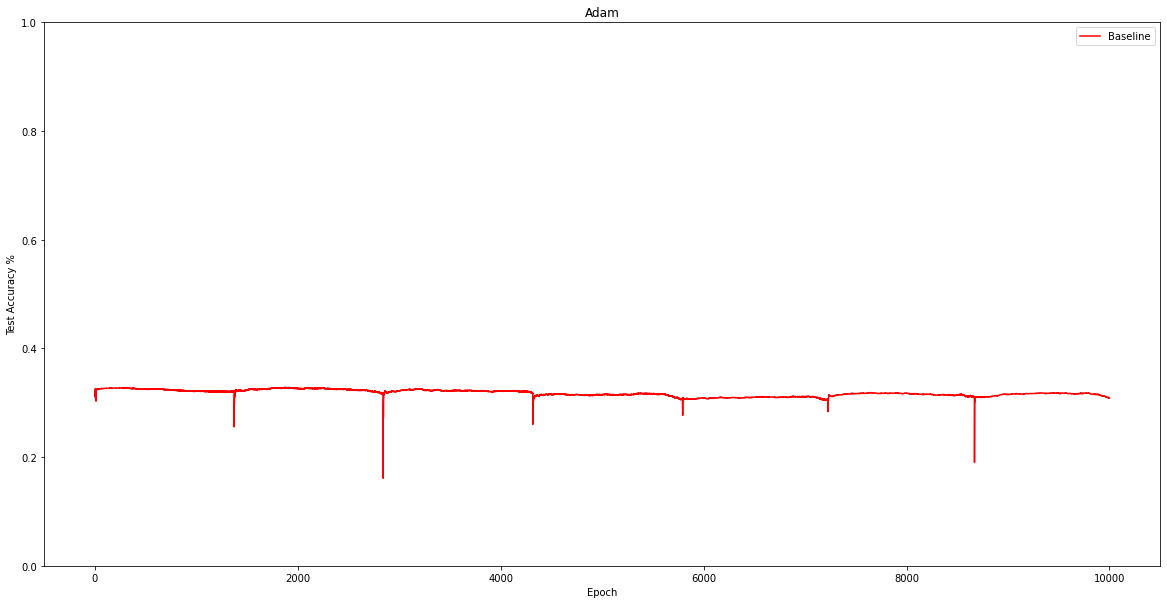

In [ ]:
#validation_baseline = history.history['val_accuracy']
baseline = history2.history['val_accuracy']

epochs = range(0,10000)
plt.figure(figsize=(20,10))
plt.plot(epochs, baseline, 'r', label='Baseline')
#plt.plot(epochs, augmented, 'b', label='Augmented')
plt.axis([None, None, 0, 1])
plt.title('Adam')
plt.xlabel('Epoch')
plt.ylabel('Test Accuracy %')
plt.legend()
plt.show()

### Transfer Learning Data

In [ ]:
#Create 2D CNN with 2 hidden layers
shape = (32,32,3) # Define shape of input for Keras model

init = tf.keras.initializers.HeNormal(seed=None)

model_final = keras.Sequential(
    [
        tf.keras.layers.Input(shape=shape),
        tf.keras.layers.Conv2D(filters=10, kernel_size=(5,5), strides=1, activation='relu'),
        tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=2),
        tf.keras.layers.Conv2D(filters=10, kernel_size=(5,5), strides=1, activation='relu'),
        tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=2),
        tf.keras.layers.Flatten(),
        #tf.keras.layers.Dense(513,activation='relu'),
        tf.keras.layers.Dense(20,activation='relu'),
        #tf.keras.layers.Dense(10, activation='softmax',kernel_initializer=init)
    ]
)

model_final.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 28, 28, 10)        760       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 14, 14, 10)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 10, 10, 10)        2510      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 5, 5, 10)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 250)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 20)                5020      
Total params: 8,290
Trainable params: 8,290
Non-trainable params: 0
____________________________________________________

In [ ]:
#Load saved pretext model parameters and weights
model_final.load_weights('my_model.h5')

In [ ]:
#softmax = tf.keras.layers.Dense(10, activation='softmax',kernel_initializer=init)
#model_final = tf.keras.layers.add(softmax)
last_layer = layers.Dense(10, activation='softmax',kernel_initializer=init)
model_final.add(last_layer)

#model_final.add(10, activation='softmax',kernel_initializer=init))

In [ ]:
model_final.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 28, 28, 10)        760       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 14, 14, 10)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 10, 10, 10)        2510      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 5, 5, 10)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 250)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 20)                5020      
_________________________________________________________________
dense_7 (Dense)              (None, 10)               

In [ ]:
#Compile and fit the model 
model_final.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
#model.compile(loss="MeanSquaredError", optimizer="adam", metrics=["accuracy"])

#model.fit(S_abs[:,:,np.newaxis], X_abs[:,np.newaxis,:], batch_size=50, epochs=50, validation_split=0.1)
#model.fit(X_train, y_train, batch_size=50, epochs=200, validation_split=0.1)
history3 = model_final.fit(X_train_500, y_train_500, batch_size = 32, epochs=10000, validation_data=(X_test, y_test)) #batch_size = 512

Streaming output truncated to the last 5000 lines.
16/16 [==============================] - 1s 38ms/step - loss: 6.4373e-09 - accuracy: 1.0000 - val_loss: 20.1867 - val_accuracy: 0.3493
Epoch 7502/10000
16/16 [==============================] - 1s 39ms/step - loss: 6.1989e-09 - accuracy: 1.0000 - val_loss: 20.1995 - val_accuracy: 0.3492
Epoch 7503/10000
16/16 [==============================] - 1s 39ms/step - loss: 6.1989e-09 - accuracy: 1.0000 - val_loss: 20.2117 - val_accuracy: 0.3490
Epoch 7504/10000
16/16 [==============================] - 1s 40ms/step - loss: 5.9605e-09 - accuracy: 1.0000 - val_loss: 20.2189 - val_accuracy: 0.3488
Epoch 7505/10000
16/16 [==============================] - 1s 38ms/step - loss: 6.4373e-09 - accuracy: 1.0000 - val_loss: 20.2345 - val_accuracy: 0.3488
Epoch 7506/10000
16/16 [==============================] - 1s 40ms/step - loss: 5.7220e-09 - accuracy: 1.0000 - val_loss: 20.2359 - val_accuracy: 0.3488
Epoch 7507/10000
16/16 [==============================

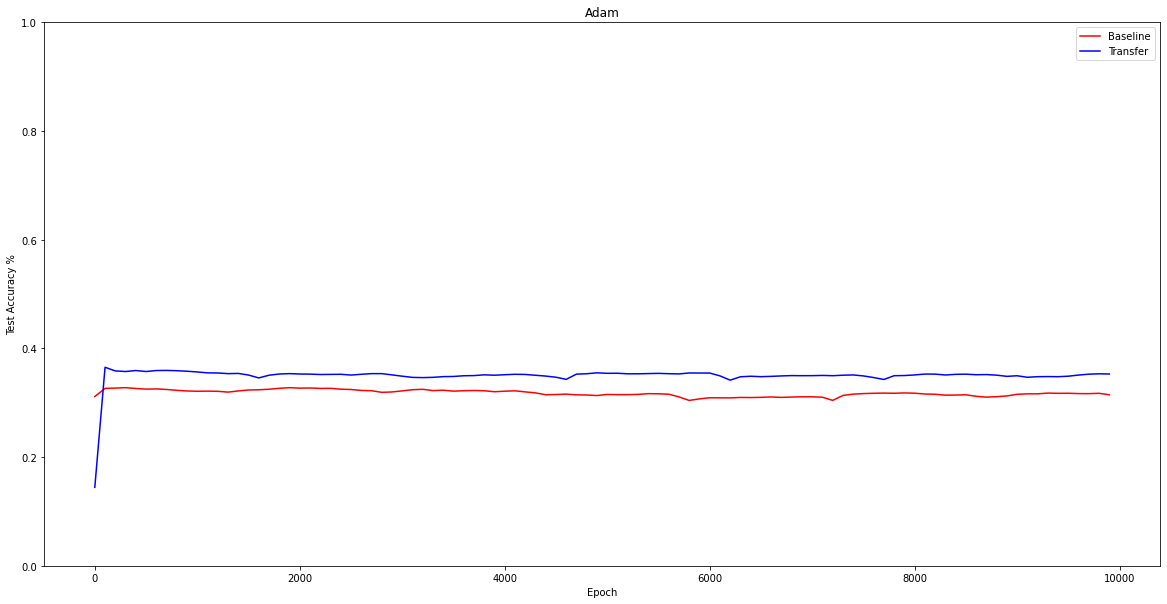

In [ ]:
#Capture results for every 100th epoch and visualize
baseline_list = []
for i in range(0,10000,100):
  baseline_list.append(history2.history['val_accuracy'][i])

transfer_list = []
for i in range(0,10000,100):
  transfer_list.append(history3.history['val_accuracy'][i])

epochs = range(0,10000,100)
plt.figure(figsize=(20,10))
plt.plot(epochs, baseline_list, 'r', label='Baseline')
plt.plot(epochs, transfer_list, 'b', label='Transfer')
plt.axis([None, None, 0, 1])
plt.title('Adam')
plt.xlabel('Epoch')
plt.ylabel('Test Accuracy %')
plt.legend()
plt.show()